In [167]:
import numpy as np
import pandas as pd

In [168]:
data=pd.read_csv("project/stock_metadata.csv")

In [169]:
data

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finserv Ltd.,FINANCIAL SERVICES,BAJAJFINSV,EQ,INE918I01018
5,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024
6,Bharti Airtel Ltd.,TELECOM,BHARTIARTL,EQ,INE397D01024
7,Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011
8,Britannia Industries Ltd.,CONSUMER GOODS,BRITANNIA,EQ,INE216A01030
9,Cipla Ltd.,PHARMA,CIPLA,EQ,INE059A01026


In [170]:
# importing dataset
adaniports=pd.read_csv("project/dataset/ADANIPORTS.csv")

In [171]:
adaniports.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [172]:
adaniports.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [173]:
x=adaniports.iloc[:,3:8]

In [174]:
x.shape

(3322, 5)

In [175]:
y=adaniports["Close"]

In [176]:
import seaborn as sns

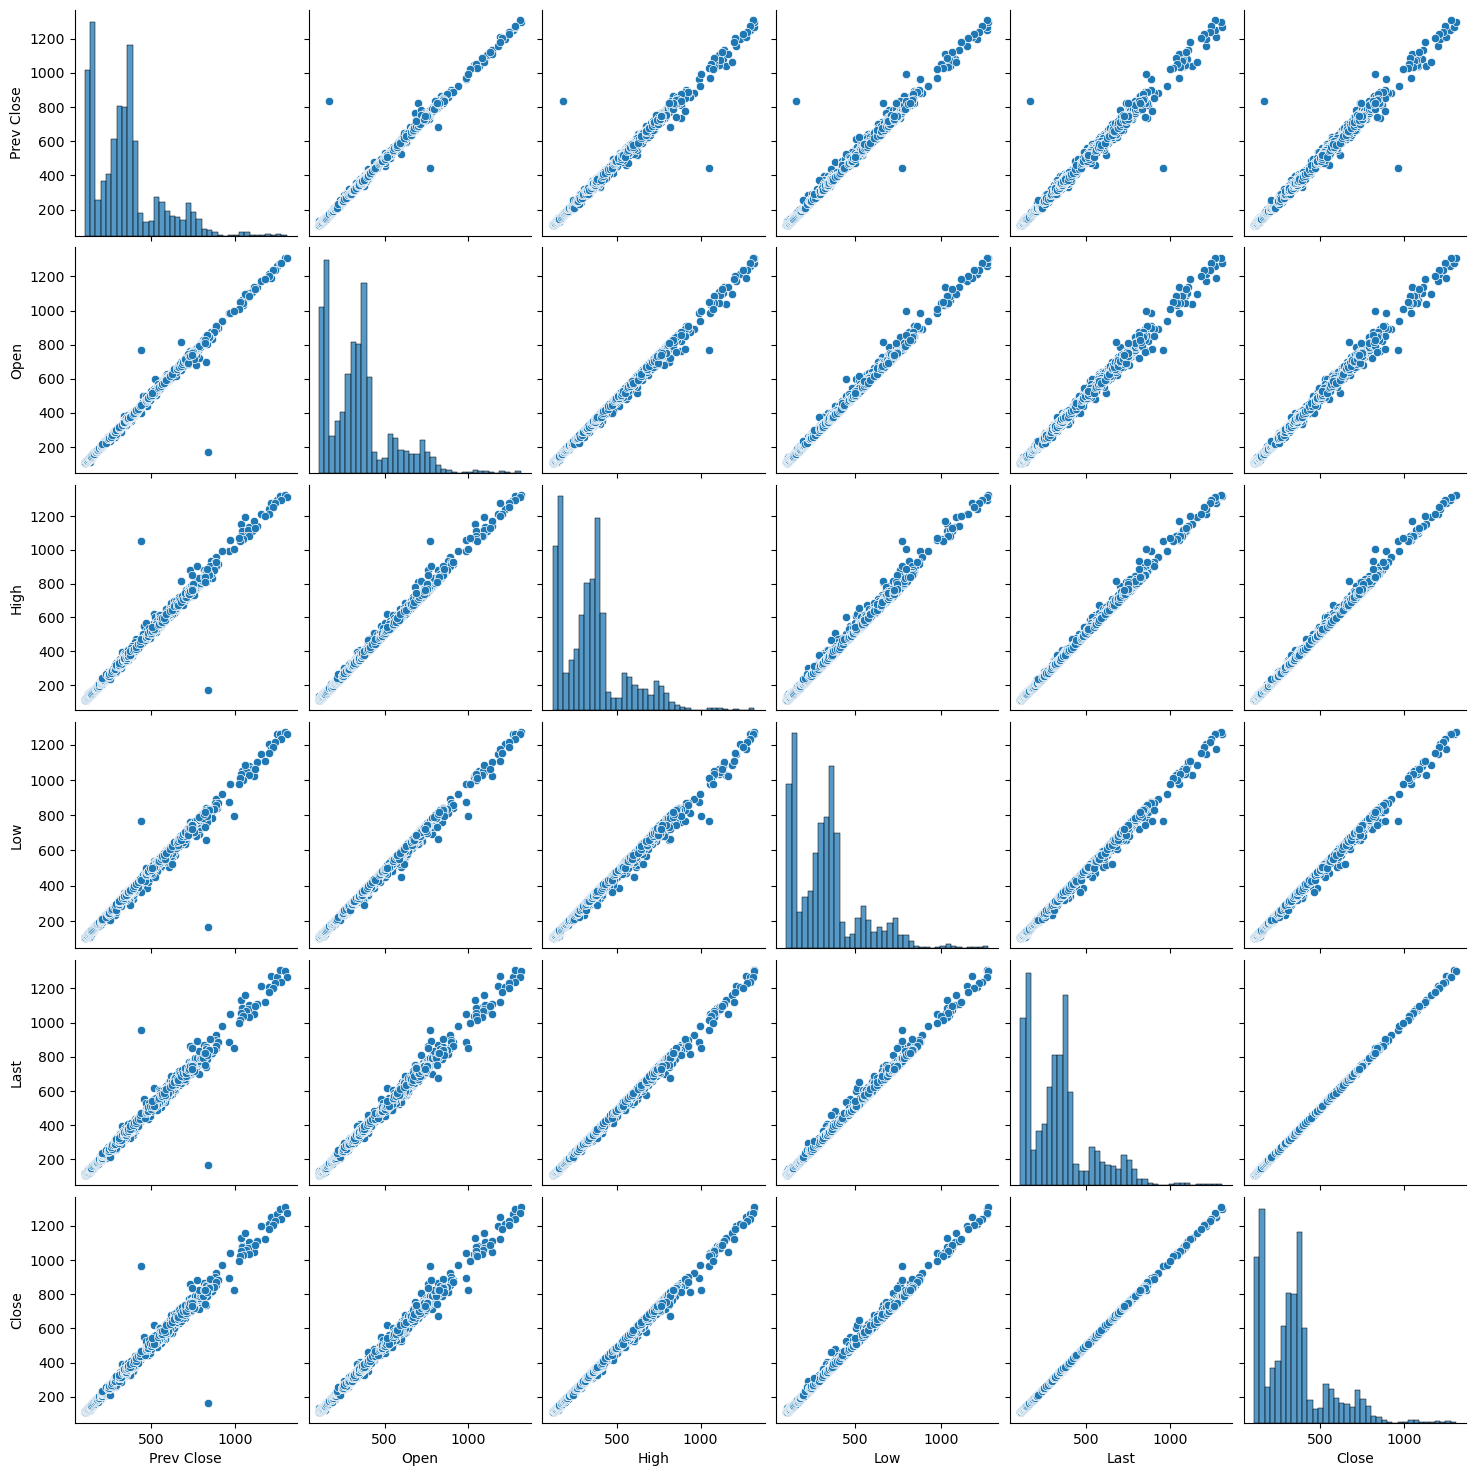

In [177]:
sns.pairplot(adaniports.iloc[:,3:9])

# Linear regression

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lrmodel=LinearRegression()

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [182]:
lrmodel.fit(x_train,y_train)

LinearRegression()

In [183]:
ylr_pred=lrmodel.predict(x_test)

In [184]:
ylr_pred

array([144.81642965, 132.61568396, 377.83931371, ..., 410.37200558,
       368.72170708, 715.47824238])

In [185]:
from sklearn.metrics import mean_squared_error
print(f"RMSE  : {np.sqrt(mean_squared_error(y_test,ylr_pred))}")

RMSE  : 1.610161998323616


In [186]:
lrmodel.score(x_test,y_test)

0.999932633455046

# RandomForest

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [190]:
model=RandomForestRegressor()

In [191]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [192]:
y_test=np.array(y_test).reshape((-1,1))

In [193]:
y_test=pd.DataFrame(y_test)

In [194]:
pred=model.predict(x_test)


In [195]:
from sklearn.metrics import accuracy_score

In [196]:
model.score(x_test,y_test)

0.9997992716767953

In [197]:
x.tail()

,Prev Close,Open,High,Low,Last
3317,725.35,733.0,739.65,728.90,729.2
3318,730.75,735.0,757.50,727.35,748.6
3319,749.15,755.0,760.00,741.10,743.4
3320,746.25,753.2,765.85,743.40,746.4
3321,746.75,739.0,759.45,724.50,726.4


In [198]:
test=np.array([746.75,739.0,759.45,724.50,726.4]).reshape((1,-1))
test=pd.DataFrame(test)
test.shape

(1, 5)

In [199]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([730.0775])

In [200]:
y.tail()

3317    730.75
3318    749.15
3319    746.25
3320    746.75
3321    730.05
Name: Close, dtype: float64

In [202]:
import pickle

In [203]:
pickle.dump(model,open("Asian.pkl","wb"))

In [204]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([730.0775])

In [205]:
x_test.tail()

,Prev Close,Open,High,Low,Last
2194,266.85,268.95,268.95,263.15,264.00
3271,591.85,592.30,621.65,586.10,611.75
2538,415.05,417.00,417.00,409.65,410.00
2636,364.05,366.40,371.00,364.10,368.65
626,714.40,715.00,721.85,712.25,714.95


In [206]:
y_test.tail()

,0
1092,264.00
1093,616.60
1094,410.45
1095,369.60
1096,714.35


# BAJFINANCE

In [207]:
bajaj=pd.read_csv("project/dataset/BAJFINANCE.csv")

In [208]:
bajaj.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [209]:
bajaj.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [210]:
x=bajaj.iloc[:,3:8]

In [211]:
y=bajaj["Close"]

In [212]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [213]:
model.score(x_test,y_test)

0.999924020406929

In [214]:
x.tail()

,Prev Close,Open,High,Low,Last
5230,4667.80,4690.0,4829.00,4690.00,4744.0
5231,4736.55,4747.0,4889.85,4746.55,4886.0
5232,4865.05,4915.0,5310.00,4915.00,5255.0
5233,5280.90,5350.0,5525.00,5330.00,5475.0
5234,5484.85,5350.0,5524.65,5327.70,5449.0


In [215]:
y.tail()

5230    4736.55
5231    4865.05
5232    5280.90
5233    5484.85
5234    5451.90
Name: Close, dtype: float64

In [216]:
test=np.array([5280.90,5350.0,5525.00,5330.00,5475.00]).reshape((1,-1))
test=pd.DataFrame(test)
test.shape

(1, 5)

In [217]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5498.0565])

In [218]:

pickle.dump(model,open("Bajaj.pkl","wb"))

# BPCL	

In [228]:
bpcl=pd.read_csv("project/dataset/BPCL.csv")

In [229]:
bpcl.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,NaN,NaN,NaN
1,2000-01-04,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,NaN,NaN,NaN
2,2000-01-05,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,NaN,NaN,NaN
3,2000-01-06,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554,2.263623e+12,NaN,NaN,NaN
4,2000-01-07,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187,1.633890e+12,NaN,NaN,NaN


In [230]:
bpcl.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [231]:
x=bpcl.iloc[:,3:8]

In [232]:
y=bpcl["Close"]

In [233]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [234]:
model.score(x_test,y_test)

0.9998716588764087

In [235]:
x.tail()

,Prev Close,Open,High,Low,Last
5301,423.05,426.0,428.35,417.55,417.60
5302,418.90,417.5,423.10,416.55,420.00
5303,420.35,422.0,424.35,414.90,417.15
5304,417.50,422.0,423.00,417.00,419.00
5305,419.55,417.5,437.50,414.65,422.10


In [236]:
y.tail()

5301    418.90
5302    420.35
5303    417.50
5304    419.55
5305    421.80
Name: Close, dtype: float64

In [237]:
test=np.array([420.35,422.0,424.35,414.90,417.15]).reshape((1,-1))
test=pd.DataFrame(test)
test.shape

(1, 5)

In [238]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([417.71])

In [239]:
import pickle
pickle.dump(model,open("BPCL.pkl","wb"))

# CIPLA

In [240]:
cipla=pd.read_csv("project/dataset/CIPLA.csv")

In [241]:
cipla.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [242]:
cipla.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [243]:
x=cipla.iloc[:,3:8]

In [244]:
y=cipla["Close"]

In [245]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [246]:
model.score(x_test,y_test)

0.9999230181924419

In [247]:
x.tail()

,Prev Close,Open,High,Low,Last
5301,935.6,935.60,940.0,902.15,907.95
5302,905.4,913.00,919.5,901.00,911.20
5303,912.4,914.35,918.0,902.95,906.25
5304,910.2,911.95,917.4,904.00,906.00
5305,906.5,900.75,921.0,900.75,910.00


In [248]:
y.tail()

5301    905.40
5302    912.40
5303    910.20
5304    906.50
5305    910.35
Name: Close, dtype: float64

In [249]:
test=np.array([910.2,911.95,917.4,904.00,906.00]).reshape((1,-1))
test=pd.DataFrame(test)
test.shape

(1, 5)

In [250]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([907.009])

In [251]:

pickle.dump(model,open("Cipla.pkl","wb"))

# TATAMOTORS

In [252]:
tatamotors=pd.read_csv("project/dataset/tatamotors.csv")

In [253]:
tatamotors.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [254]:
tatamotors.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [255]:
x=tatamotors.iloc[:,3:8]
y=tatamotors["Close"]

In [256]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [257]:
model.score(x_test,y_test)

0.9999243789100565

In [258]:
x.tail()

,Prev Close,Open,High,Low,Last
5301,294.0,297.0,299.0,294.60,295.85
5302,295.4,295.7,302.5,295.10,302.10
5303,301.5,303.5,309.5,303.00,305.15
5304,305.9,308.9,310.0,301.25,302.20
5305,301.9,298.2,301.3,292.55,293.10


In [259]:
y.tail()

5301    295.40
5302    301.50
5303    305.90
5304    301.90
5305    293.85
Name: Close, dtype: float64

In [260]:
test=np.array([305.9,308.9,310.0,301.25,302.20]).reshape((1,-1))
test=pd.DataFrame(test)
test.shape

(1, 5)

In [261]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([302.392])

In [262]:

pickle.dump(model,open("Tatamotors.pkl","wb"))

# SBIN

In [268]:
sbin=pd.read_csv("project/dataset/SBIN.csv")

In [269]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,SBIN,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
1,2000-01-04,SBIN,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN
2,2000-01-05,SBIN,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,NaN,NaN,NaN
3,2000-01-06,SBIN,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,NaN,NaN,NaN
4,2000-01-07,SBIN,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,NaN,NaN,NaN


In [270]:
sbin.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [271]:
x=sbin.iloc[:,3:8]
y=sbin["Close"]

In [273]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [274]:
model.score(x_test,y_test)

0.9999695427999821

In [275]:
x.tail()

,Prev Close,Open,High,Low,Last
5301,336.45,339.25,347.45,339.25,344.80
5302,344.30,344.00,354.95,342.40,354.20
5303,353.05,357.00,364.30,356.05,362.90
5304,363.40,365.00,369.95,355.50,357.45
5305,359.40,353.45,362.50,350.45,352.30


In [276]:
y.tail()

5301    344.30
5302    353.05
5303    363.40
5304    359.40
5305    353.50
Name: Close, dtype: float64

In [277]:
test=np.array([363.40,365.00,369.95,355.50,357.45]).reshape((1,-1))
test=pd.DataFrame(test)
test.shape

(1, 5)

In [278]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([358.4295])

In [279]:
import pickle
pickle.dump(model,open("SBI.pkl","wb"))

# TCS	

In [280]:
tcs=pd.read_csv("project/dataset/TCS.csv")

In [281]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [282]:
tcs.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [283]:
x=tcs.iloc[:,3:8]
y=tcs["Close"]

In [284]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [285]:
model.score(x_test,y_test)

0.9999497927229111

In [286]:
x.tail()

,Prev Close,Open,High,Low,Last
4134,3109.50,3102.05,3153.00,3088.05,3100.05
4135,3100.80,3106.00,3136.10,3103.00,3132.75
4136,3132.00,3149.95,3151.00,3112.00,3123.00
4137,3124.10,3145.60,3157.35,3105.50,3114.45
4138,3115.25,3099.00,3132.05,3020.00,3040.00


In [287]:
y.tail()

4134    3100.80
4135    3132.00
4136    3124.10
4137    3115.25
4138    3035.65
Name: Close, dtype: float64

In [288]:
test=np.array([3124.10,3145.60,3157.35,3105.50,3114.45]).reshape((1,-1))
test=pd.DataFrame(test)
test.shape

(1, 5)

In [289]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3110.869])

In [290]:
import pickle
pickle.dump(model,open("TCS.pkl","wb"))

# LT

In [291]:
lt=pd.read_csv("project/dataset/LT.csv")

In [292]:
lt.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-06-23,LT,EQ,2.00,500.0,745.0,150.0,638.00,635.95,627.71,2699293,1.694372e+14,NaN,395612,0.1466
1,2004-06-24,LT,EQ,635.95,630.0,630.0,608.4,612.00,616.00,618.21,913575,5.647802e+13,NaN,305751,0.3347
2,2004-06-25,LT,EQ,616.00,619.0,679.0,616.1,665.00,668.30,658.45,1637383,1.078136e+14,NaN,217950,0.1331
3,2004-06-28,LT,EQ,668.30,660.0,671.9,640.2,653.00,656.40,657.39,913349,6.004271e+13,NaN,194984,0.2135
4,2004-06-29,LT,EQ,656.40,656.0,683.4,653.0,666.85,671.70,675.11,743063,5.016488e+13,NaN,101786,0.1370


In [293]:
lt.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1728
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [294]:
x=lt.iloc[:,3:8]
y=lt["Close"]

In [295]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [296]:
model.score(x_test,y_test)

0.9997863559124569

In [297]:
x.tail()

,Prev Close,Open,High,Low,Last
4179,1322.90,1330.05,1341.20,1323.0,1339.00
4180,1335.90,1339.00,1388.45,1335.9,1384.00
4181,1380.65,1384.85,1399.95,1372.5,1374.15
4182,1375.90,1383.95,1389.55,1353.5,1358.80
4183,1358.65,1350.00,1365.00,1336.1,1340.05


In [298]:
y.tail()

4179    1335.90
4180    1380.65
4181    1375.90
4182    1358.65
4183    1340.45
Name: Close, dtype: float64

In [299]:
test=np.array([1375.90,1383.95,1389.55,1353.5,1358.80]).reshape((1,-1))
test=pd.DataFrame(test)
test.shape

(1, 5)

In [300]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1359.2495])

In [301]:
import pickle
pickle.dump(model,open("LT.pkl","wb"))

# TITAN

In [302]:
titan=pd.read_csv("project/dataset/TITAN.csv")

In [303]:
titan.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TITAN,EQ,144.95,146.0,156.45,146.0,155.00,155.70,154.36,23000,3.550370e+11,NaN,NaN,NaN
1,2000-01-04,TITAN,EQ,155.70,152.0,152.00,144.0,148.05,147.40,146.72,26300,3.858700e+11,NaN,NaN,NaN
2,2000-01-05,TITAN,EQ,147.40,144.0,148.80,136.0,139.95,138.40,142.95,20600,2.944850e+11,NaN,NaN,NaN
3,2000-01-06,TITAN,EQ,138.40,142.0,149.50,141.0,149.50,149.50,147.87,31600,4.672750e+11,NaN,NaN,NaN
4,2000-01-07,TITAN,EQ,149.50,149.5,153.00,145.0,147.75,146.35,148.63,36600,5.439965e+11,NaN,NaN,NaN


In [304]:
titan.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [305]:
x=titan.iloc[:,3:8]
y=titan["Close"]

In [306]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model=RandomForestRegressor()

model.fit(x_train,y_train)

RandomForestRegressor()

In [307]:
model.score(x_test,y_test)

0.9999342871113556

In [308]:
x.tail()

,Prev Close,Open,High,Low,Last
5301,1461.45,1470.0,1489.75,1465.15,1478.95
5302,1479.85,1485.0,1503.55,1482.00,1498.00
5303,1495.10,1505.0,1514.90,1491.70,1509.00
5304,1508.85,1524.0,1527.50,1497.00,1504.35
5305,1506.80,1500.0,1516.55,1471.00,1489.85


In [309]:
y.tail()

5301    1479.85
5302    1495.10
5303    1508.85
5304    1506.80
5305    1491.65
Name: Close, dtype: float64

In [310]:
test=np.array([1508.85,1524.0,1527.50,1497.00,1504.35]).reshape((1,-1))
test=pd.DataFrame(test)
test.shape

(1, 5)

In [311]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1505.3325])

In [312]:
import pickle
pickle.dump(model,open("Titan.pkl","wb"))

# WIPRO

In [313]:
wipro=pd.read_csv("project/dataset/WIPRO.csv")

In [314]:
wipro.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355942e+11,NaN,NaN,NaN
1,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292192e+12,NaN,NaN,NaN
2,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157822e+13,NaN,NaN,NaN
4,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


In [315]:
wipro.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [316]:
x=wipro.iloc[:,3:8]
y=wipro["Close"]

In [317]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [318]:
model.score(x_test,y_test)

0.999261466025585

In [319]:
x.tail()

,Prev Close,Open,High,Low,Last
5301,475.70,479.40,483.85,477.00,482.00
5302,480.30,481.40,487.00,481.00,483.85
5303,485.05,485.85,493.20,481.25,488.65
5304,489.30,492.70,492.80,485.70,489.00
5305,489.85,491.50,511.80,489.30,492.50


In [320]:
y.tail()

5301    480.30
5302    485.05
5303    489.30
5304    489.85
5305    492.75
Name: Close, dtype: float64

In [321]:
test=np.array([489.30,492.70,492.80,485.70,489.00]).reshape((1,-1))
test=pd.DataFrame(test)
test.shape

(1, 5)

In [322]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([489.635])

In [323]:
import pickle
pickle.dump(model,open("Wipro.pkl","wb"))

# ITC	

In [324]:
itc=pd.read_csv("project/dataset/ITC.csv")

In [325]:
itc.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN


In [326]:
itc.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [327]:
x=itc.iloc[:,3:8]
y=itc["Close"]

In [328]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [329]:
model.score(x_test,y_test)

0.9998561317277385

In [330]:
x.tail()

,Prev Close,Open,High,Low,Last
5301,205.35,205.8,206.75,204.70,205.50
5302,205.30,205.3,206.95,205.05,205.50
5303,205.40,206.0,206.50,205.30,205.65
5304,205.50,207.1,207.55,204.05,204.40
5305,204.30,203.9,205.70,202.00,202.40


In [331]:
y.tail()

5301    205.3
5302    205.4
5303    205.5
5304    204.3
5305    202.6
Name: Close, dtype: float64

In [332]:
test=np.array([205.50,207.1,207.55,204.05,204.40]).reshape((1,-1))
test=pd.DataFrame(test)
test.shape

(1, 5)

In [333]:
model.predict(test)

C:\Users\Uday6\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([204.4405])

In [334]:
import pickle
pickle.dump(model,open("ITC.pkl","wb"))